<h1> Decision Tree </h1>

In [0]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.tree import DecisionTreeClassifier

In [0]:
path_ = ''
data = pd.read_csv(path_ + 'preprocessed_data.csv' ,  nrows=5000)

In [0]:
# 
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
#X.head(1)
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.33, stratify=y)

In [0]:
#
print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("*"*100)
print("Data model for Essay")
tfidf_vec_essay = TfidfVectorizer(min_df=10 , ngram_range=(1,4), max_features=5000 )
tfidf_vec_essay.fit(X_train['essay'].values) 

X_train_essay_tfidf = tfidf_vec_essay.transform(X_train['essay'].values)
X_test_essay_tfidf = tfidf_vec_essay.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

Before vectorizations
(3350, 8) (3350,)
(1650, 8) (1650,)
****************************************************************************************************
Data model for Essay
After vectorizations
(3350, 5000) (3350,)
(1650, 5000) (1650,)


In [34]:
# 
print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('*'*100)

print("Data model for school_state")
tfidf_vec_state = TfidfVectorizer()
#text_tfidf = tfidf_vectorizer.fit_transform(X_train['school_state'].values)
#print("Shape of matrix after one hot encodig ",text_tfidf.shape)
tfidf_vec_state.fit(X_train['school_state'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_state_tfidf = tfidf_vec_state.transform(X_train['school_state'].values)
X_test_state_tfidf = tfidf_vec_state.transform(X_test['school_state'].values)

print("After Tf-Idf vectorizations")
print(X_train_state_tfidf.shape, y_train.shape)
print(X_test_state_tfidf.shape, y_test.shape)
print("="*100)

#
print("Data model for teacher_prefix")
tfidf_vec_teacher = TfidfVectorizer()
tfidf_vec_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_tfidf = tfidf_vec_teacher.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_tfidf = tfidf_vec_teacher.transform(X_test['teacher_prefix'].values)

print("After Tf-Idf vectorizations")
print(X_train_teacher_prefix_tfidf.shape, y_train.shape)
print(X_test_teacher_prefix_tfidf.shape, y_test.shape)
print("="*100)

#
print("Data model for clean_categories")
tfidf_vec_catg = TfidfVectorizer()
tfidf_vec_catg.fit(X_train['clean_categories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_catg_tfidf = tfidf_vec_catg.transform(X_train['clean_categories'].values)
X_test_catg_tfidf = tfidf_vec_catg.transform(X_test['clean_categories'].values)

print("After Tf-Idf vectorizations")
print(X_train_catg_tfidf.shape, y_train.shape)
print(X_test_catg_tfidf.shape, y_test.shape)
print("="*100)

#
print("Data model for clean_subcategories")
tfidf_vec_subcatg = TfidfVectorizer()
tfidf_vec_subcatg.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_subcatg_tfidf = tfidf_vec_subcatg.transform(X_train['clean_subcategories'].values)
X_test_subcatg_tfidf = tfidf_vec_subcatg.transform(X_test['clean_subcategories'].values)

print("After Tf-Idf vectorizations")
print(X_train_subcatg_tfidf.shape, y_train.shape)
print(X_test_subcatg_tfidf.shape, y_test.shape)

print("="*100)

#
print("Data model for project_grade_category")
tfidf_vec_gcatg = TfidfVectorizer()
tfidf_vec_gcatg.fit(X_train['project_grade_category'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_gcatg_tfidf = tfidf_vec_gcatg.transform(X_train['project_grade_category'].values)
X_test_gcatg_tfidf = tfidf_vec_gcatg.transform(X_test['project_grade_category'].values)

print("After Tf-Idf vectorizations")
print(X_train_gcatg_tfidf.shape, y_train.shape)
print(X_test_gcatg_tfidf.shape, y_test.shape)
print("="*100)


# numerical features
# 
#Data Model for teacher_number_of_previously_posted_projects
print("Data Model for teacher_number_of_previously_posted_projects")
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_no_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_no_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_no_norm.shape, y_train.shape)
print(X_test_teacher_no_norm.shape, y_test.shape)
print("="*100)

#Data Model for project price
print("Data Model for project price")
normalizer2 = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer2.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer2.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer2.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


# Final Data Matrix
X_tr_tfidf = hstack((X_train_essay_tfidf , X_train_state_tfidf ,X_train_teacher_prefix_tfidf , \
               X_train_catg_tfidf , X_train_subcatg_tfidf ,X_train_gcatg_tfidf , X_train_price_norm , X_train_teacher_no_norm )).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf , X_test_state_tfidf , X_test_teacher_prefix_tfidf , \
          X_test_catg_tfidf , X_test_subcatg_tfidf , X_test_gcatg_tfidf , X_test_price_norm ,  X_test_teacher_no_norm )).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Before vectorizations
(3350, 8) (3350,)
(1650, 8) (1650,)
****************************************************************************************************
Data model for school_state
After Tf-Idf vectorizations
(3350, 51) (3350,)
(1650, 51) (1650,)
Data model for teacher_prefix
After Tf-Idf vectorizations
(3350, 4) (3350,)
(1650, 4) (1650,)
Data model for clean_categories
After Tf-Idf vectorizations
(3350, 7) (3350,)
(1650, 7) (1650,)
Data model for clean_subcategories
After Tf-Idf vectorizations
(3350, 28) (3350,)
(1650, 28) (1650,)
Data model for project_grade_category
After Tf-Idf vectorizations
(3350, 4) (3350,)
(1650, 4) (1650,)
Data Model for teacher_number_of_previously_posted_projects
After vectorizations
(3350, 1) (3350,)
(1650, 1) (1650,)
Data Model for project price
After vectorizations
(3350, 1) (3350,)
(1650, 1) (1650,)
Final Data matrix
(3350, 5096) (3350,)
(1650, 5096) (1650,)


In [0]:
#
param_dist = {"max_depth": [1, 5, 10, 50], 
              "min_samples_split": [5, 10, 100, 500], 
              "criterion": ["entropy"]} 

# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 

# Instantiating RandomizedSearchCV object 
random_search = RandomizedSearchCV(tree, param_dist, cv = 3, scoring='roc_auc' , return_train_score=True)

random_search.fit(X_tr_tfidf, y_train)

min_samples_split_tfidf = random_search.best_params_['min_samples_split']
max_depth_tfidf = random_search.best_params_['max_depth']
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters for training data: {}".format(random_search.best_params_)) 
#print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters for training data: {'min_samples_split': 500, 'max_depth': 10, 'criterion': 'entropy'}


In [0]:
param_dist = {"max_depth": [1, 5, 10, 50], 
              "min_samples_split": [5, 10, 100, 500], 
              "criterion": ["entropy"]}  

#To apply DecisionTreeClassifier for tuned parameter
# Instantiating RandomizedSearchCV object
tree_test = RandomizedSearchCV( DecisionTreeClassifier(), param_dist, cv = 3, scoring='roc_auc' , return_train_score=True)
#Training the test data
tree_test.fit(X_te_tfidf, y_test)

# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters for test data: {}".format( tree_test.best_params_ )) 
#print("Best score is {}".format(tree_test.best_score_)) 

Tuned Decision Tree Parameters for test data: {'min_samples_split': 500, 'max_depth': 50, 'criterion': 'entropy'}


In [0]:
results = pd.DataFrame.from_dict( random_search.cv_results_ )
#print(results.columns)
train_auc = results['mean_train_score']
#train_auc_std= results['std_train_score']
#test_auc = results['mean_test_score'] 
#test_auc_std= results['std_test_score']
K =  results['params']
min_samples_split = [i['min_samples_split'] for i in K]
max_depth = [i['max_depth'] for i in K]

#test
te_results = pd.DataFrame.from_dict(tree_test.cv_results_)
test_auc = te_results['mean_test_score'] 
te_K =  te_results['params']
min_samples_split_te = [i['min_samples_split'] for i in te_K]
max_depth_te = [i['max_depth'] for i in te_K]

In [0]:
#https://stackoverflow.com/questions/56277838/using-plotly-in-offline-mode-in-google-colab
#To display Scatter3d plot
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

import plotly.offline as offline
import plotly.graph_objs as go
#from plotly.graph_objs import *
#offline.init_notebook_mode()
#import numpy as np
offline.init_notebook_mode(connected=True)

configure_plotly_browser_state()

trace1 = go.Scatter3d(x= min_samples_split ,y=  max_depth ,z= train_auc, name = 'train data' \
  ,mode = 'markers', marker = dict(
      size = 10,
      color = 'green', # set color to an array/list of desired values
      colorscale = 'Viridis'
      )
  )
trace2 = go.Scatter3d(x= min_samples_split_te,y= max_depth_te,z= test_auc, name = 'Cross validation data'
  ,mode = 'markers', marker = dict(
      size = 10,
      color = 'orange', # set color to an array/list of desired values
      colorscale = 'Viridis'
      ))

layout = go.Layout(title = '3D Scatter plot')

fig = go.Figure(data=[trace1 , trace2], layout=layout)
offline.iplot(fig)

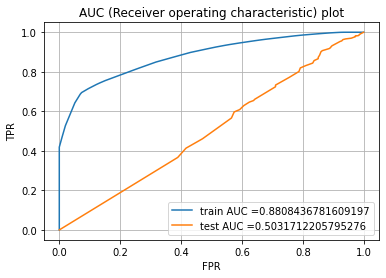

In [0]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

#min_samples_split=500, max_depth=10, criterion='entropy'
tree = DecisionTreeClassifier(min_samples_split=500, max_depth=None, criterion='entropy') 
tree.fit(X_tr_tfidf, y_train)

y_train_pred = batch_predict(tree, X_tr_tfidf)
y_test_pred = batch_predict(tree, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_for_tfidf = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC (Receiver operating characteristic) plot")
plt.grid()
plt.show()

In [0]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
best_threshold = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_threshold )))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_threshold )))

Train confusion matrix
[[ 407   43]
 [ 827 2073]]
Test confusion matrix
[[ 87 134]
 [530 899]]


[0.76744186 0.09302326 0.09302326 0.02325581 0.         0.
 0.         0.         0.         0.02325581]
[ 0.   5.4 10.8 16.2 21.6 27.  32.4 37.8 43.2 48.6 54. ]


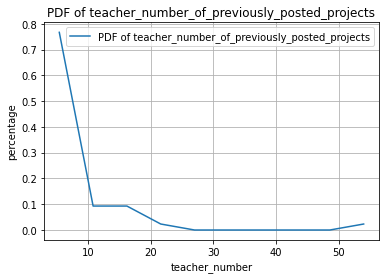

In [0]:
X_train_temp = X_train.iloc[0:X_train.shape[0]]
X_test_temp = X_train.iloc[0:X_test.shape[0]]

X_train_temp['y_train'] = y_train
X_train_temp['y_predicted'] = predict_with_best_t(y_train_pred, best_threshold )
X_test_temp['y_test'] = y_test
X_test_temp['y_predicted'] =  predict_with_best_t(y_test_pred, best_threshold )

X_train_frame = pd.DataFrame(X_train_temp)
#X_train_temp = X_train_temp.drop(['y_train'] , axis=1)
X_train_DataFrame = X_train_frame.loc[( X_train_frame["y_train"] == 0) & ( X_train_frame["y_predicted"] == 1)]

#PDF
#Reference : Assignment-4. Exploratory Data Analysis
counts, bin_edges = np.histogram(X_train_DataFrame['teacher_number_of_previously_posted_projects'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

plt.plot(bin_edges[1:],pdf,label="PDF of teacher_number_of_previously_posted_projects");

plt.title("PDF of teacher_number_of_previously_posted_projects")
plt.xlabel("teacher_number")
plt.ylabel("percentage")
plt.grid("whitegrid")
plt.legend()
plt.show();

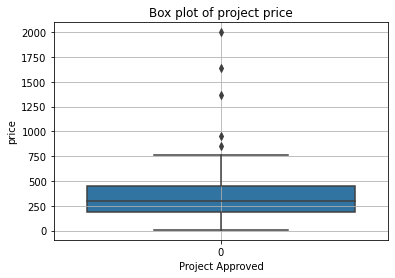

In [0]:
data_t = X_train_DataFrame[['price','y_train']]
data_t = data_t.rename(columns={'y_train' : 'Project Approved'})
sns.boxplot(x='Project Approved',y='price', data= data_t )
plt.title("Box plot of project price")
plt.grid("whitegrid")
plt.show()

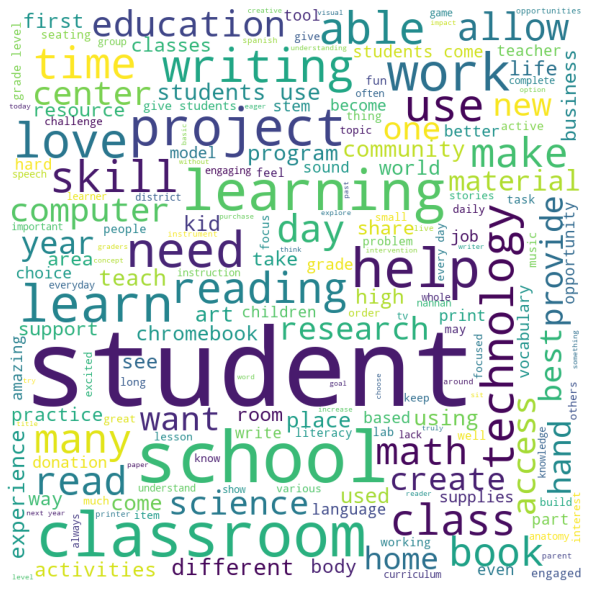

In [0]:
from wordcloud import WordCloud, STOPWORDS 

#https://www.geeksforgeeks.org/generating-word-cloud-python  
# Reads 'Youtube04-Eminem.csv' file  
df = X_train_DataFrame['essay']
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.values: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#
all_features_lst = list(tfidf_vec_essay.get_feature_names() + tfidf_vec_state.get_feature_names() + \
                        tfidf_vec_teacher.get_feature_names() + \
                        tfidf_vec_catg.get_feature_names() + \
                        tfidf_vec_subcatg.get_feature_names() + \
                        tfidf_vec_gcatg.get_feature_names() + \
                    ["Price"] + ["teacher_number_of_previously_posted_projects"])

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

feature_imp_list = dict(zip(all_features_lst , tree.feature_importances_ ))
top_feature_imp = {key:val for key, val in feature_imp_list.items() if val != 0 } 
print(top_feature_imp)

{'90': 0.01630394379115939, 'academy': 0.019407091599046387, 'adding': 0.01346192047346214, 'alternative': 0.021233949098337188, 'autism': 0.01795616866799643, 'box': 0.01938725569842408, 'classes': 0.01648608152908279, 'dr': 0.01608462918200229, 'efficiently': 0.01589594160472005, 'end': 0.013823237647817876, 'excited learning': 0.018833973947931452, 'extremely': 0.01636082021317673, 'follow': 0.01953511914412706, 'help': 0.017512661914677225, 'higher': 0.018711058918266868, 'idea': 0.015416405155016, 'instill love': 0.01643749170869478, 'interests': 0.02075223760974802, 'involvement': 0.018227272020819793, 'leads': 0.017121431401103927, 'learn': 0.015525670544880103, 'learning skills': 0.016602989488417597, 'like': 0.05157710454004181, 'main': 0.015933194090260793, 'making': 0.018427729247412247, 'met': 0.018439051970618264, 'methods': 0.019881835988977224, 'needed': 0.01675695107055634, 'needs met': 0.016603947308072048, 'new world': 0.016830403220822805, 'no': 0.019784105646110633,

In [35]:
# top feature vocabulary
top_feature_vocab = {}
i = 0
for k , v in top_feature_imp.items():
  top_feature_vocab[k] = i
  i = i+1

print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('*'*100)

print("*"*100)
print("Data model for Essay")
tfidf_vec_essay_imp = TfidfVectorizer(vocabulary= top_feature_vocab)
tfidf_vec_essay_imp.fit(X_train['essay'].values) 

X_train_essay_tfidf_imp = tfidf_vec_essay_imp.transform(X_train['essay'].values)
X_test_essay_tfidf_imp = tfidf_vec_essay_imp.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf_imp.shape, y_train.shape)
print(X_test_essay_tfidf_imp.shape, y_test.shape)
print("="*100)

print("Data model for school_state")
tfidf_vec_state_imp = TfidfVectorizer(vocabulary= top_feature_vocab)
#text_tfidf = tfidf_vectorizer.fit_transform(X_train['school_state'].values)
#print("Shape of matrix after one hot encodig ",text_tfidf.shape)
tfidf_vec_state_imp.fit(X_train['school_state'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_state_tfidf_imp = tfidf_vec_state_imp.transform(X_train['school_state'].values)
X_test_state_tfidf_imp = tfidf_vec_state_imp.transform(X_test['school_state'].values)

print("After Tf-Idf vectorizations")
print(X_train_state_tfidf_imp.shape, y_train.shape)
print(X_test_state_tfidf_imp.shape, y_test.shape)
print("="*100)

#
print("Data model for teacher_prefix")
tfidf_vec_teacher_imp = TfidfVectorizer(vocabulary= top_feature_vocab)
tfidf_vec_teacher_imp.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_tfidf_imp = tfidf_vec_teacher_imp.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_tfidf_imp = tfidf_vec_teacher_imp.transform(X_test['teacher_prefix'].values)

print("After Tf-Idf vectorizations")
print(X_train_teacher_prefix_tfidf_imp.shape, y_train.shape)
print(X_test_teacher_prefix_tfidf_imp.shape, y_test.shape)
print("="*100)

#
print("Data model for clean_categories")
tfidf_vec_catg_imp = TfidfVectorizer(vocabulary= top_feature_vocab)
tfidf_vec_catg_imp.fit(X_train['clean_categories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_catg_tfidf_imp = tfidf_vec_catg_imp.transform(X_train['clean_categories'].values)
X_test_catg_tfidf_imp = tfidf_vec_catg_imp.transform(X_test['clean_categories'].values)

print("After Tf-Idf vectorizations")
print(X_train_catg_tfidf_imp.shape, y_train.shape)
print(X_test_catg_tfidf_imp.shape, y_test.shape)
print("="*100)

#
print("Data model for clean_subcategories")
tfidf_vec_subcatg_imp = TfidfVectorizer(vocabulary= top_feature_vocab)
tfidf_vec_subcatg_imp.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_subcatg_tfidf_imp = tfidf_vec_subcatg_imp.transform(X_train['clean_subcategories'].values)
X_test_subcatg_tfidf_imp = tfidf_vec_subcatg_imp.transform(X_test['clean_subcategories'].values)

print("After Tf-Idf vectorizations")
print(X_train_subcatg_tfidf_imp.shape, y_train.shape)
print(X_test_subcatg_tfidf_imp.shape, y_test.shape)

print("="*100)

#
print("Data model for project_grade_category")
tfidf_vec_gcatg_imp = TfidfVectorizer(vocabulary= top_feature_vocab)
tfidf_vec_gcatg_imp.fit(X_train['project_grade_category'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_gcatg_tfidf_imp = tfidf_vec_gcatg_imp.transform(X_train['project_grade_category'].values)
X_test_gcatg_tfidf_imp = tfidf_vec_gcatg_imp.transform(X_test['project_grade_category'].values)

print("After Tf-Idf vectorizations")
print(X_train_gcatg_tfidf_imp.shape, y_train.shape)
print(X_test_gcatg_tfidf_imp.shape, y_test.shape)
print("="*100)


# numerical features
# 
#Data Model for teacher_number_of_previously_posted_projects
print("Data Model for teacher_number_of_previously_posted_projects")
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_no_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_no_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_no_norm.shape, y_train.shape)
print(X_test_teacher_no_norm.shape, y_test.shape)
print("="*100)

#Data Model for project price
print("Data Model for project price")
normalizer2 = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer2.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer2.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer2.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


# Final Data Matrix
X_tr_tfidf_imp = hstack((X_train_essay_tfidf_imp , X_train_state_tfidf_imp ,X_train_teacher_prefix_tfidf_imp , \
               X_train_catg_tfidf_imp , X_train_subcatg_tfidf_imp ,X_train_gcatg_tfidf_imp ,\
               X_train_price_norm , X_train_teacher_no_norm )).tocsr()
X_te_tfidf_imp = hstack((X_test_essay_tfidf_imp , X_test_state_tfidf_imp , X_test_teacher_prefix_tfidf_imp , \
          X_test_catg_tfidf_imp , X_test_subcatg_tfidf_imp , X_test_gcatg_tfidf_imp ,\
          X_test_price_norm ,  X_test_teacher_no_norm )).tocsr()

print("Final Data matrix")
print(X_tr_tfidf_imp.shape, y_train.shape)
print(X_te_tfidf_imp.shape, y_test.shape)
print("="*100)

Before vectorizations
(3350, 8) (3350,)
(1650, 8) (1650,)
****************************************************************************************************
****************************************************************************************************
Data model for Essay
After vectorizations
(3350, 53) (3350,)
(1650, 53) (1650,)
Data model for school_state
After Tf-Idf vectorizations
(3350, 53) (3350,)
(1650, 53) (1650,)
Data model for teacher_prefix
After Tf-Idf vectorizations
(3350, 53) (3350,)
(1650, 53) (1650,)
Data model for clean_categories
After Tf-Idf vectorizations
(3350, 53) (3350,)
(1650, 53) (1650,)
Data model for clean_subcategories
After Tf-Idf vectorizations
(3350, 53) (3350,)
(1650, 53) (1650,)
Data model for project_grade_category
After Tf-Idf vectorizations
(3350, 53) (3350,)
(1650, 53) (1650,)
Data Model for teacher_number_of_previously_posted_projects
After vectorizations
(3350, 1) (3350,)
(1650, 1) (1650,)
Data Model for project price
After vectorizations


In [0]:
param_dist = {"max_depth": [1, 5, 10, 50], 
              "min_samples_split": [5, 10, 100, 500], 
              "criterion": ["entropy"]} 
  
# Instantiating Decision Tree classifier 
tree_top_f = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree_top_f, param_dist, cv = 3, scoring='roc_auc' , return_train_score=True)

tree_cv.fit(X_tr_tfidf_imp, y_train)

#min_samples_split_imp = tree_cv.best_params_['min_samples_split']
#max_depth_imp = tree_cv.best_params_['max_depth']
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
#print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_split': 500, 'max_depth': 10, 'criterion': 'entropy'}


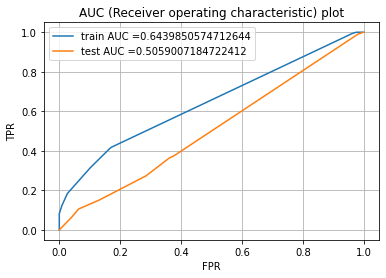

In [0]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

#min_samples_split=500, max_depth=10, criterion='entropy'
tree_top_f1 = DecisionTreeClassifier(min_samples_split=5, max_depth=5, criterion='entropy') 
tree_top_f1.fit(X_tr_tfidf_imp, y_train)

y_train_pred = batch_predict(tree_top_f1, X_tr_tfidf_imp)
y_test_pred = batch_predict(tree_top_f1, X_te_tfidf_imp)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_for_tfidf_imp = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC (Receiver operating characteristic) plot")
plt.grid()
plt.show()

In [0]:
with open(path_ + 'glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:

def compute_TFIDF_W2V(preprocessed_data):

  tfidf_model = TfidfVectorizer()
  tfidf_model.fit(preprocessed_data)
  # we are converting a dictionary with word as a key, and the idf as a value
  dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
  tfidf_words = set(tfidf_model.get_feature_names())
  # compute average word2vec for each review.
  tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(preprocessed_data): # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  
  return np.array(tfidf_w2v_vectors)

In [0]:

print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("*"*100)

print("Data model for Essay")
X_train_essay_tfidfw2v = compute_TFIDF_W2V(X_train['essay'].values)
X_test_essay_tfidfw2v = compute_TFIDF_W2V(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidfw2v.shape, y_train.shape)
print(X_test_essay_tfidfw2v.shape, y_test.shape)
print("="*100)


print("Data model for school_state")
X_train_state_tfidfw2v = compute_TFIDF_W2V(X_train['school_state'].values)
X_test_state_tfidfw2v = compute_TFIDF_W2V(X_test['school_state'].values)

print("After Tf-Idf vectorizations")
print(X_train_state_tfidfw2v.shape, y_train.shape)
print(X_test_state_tfidfw2v.shape, y_test.shape)
print("="*100)

#
print("Data model for teacher_prefix")
X_train_teacher_prefix_tfidfw2v = compute_TFIDF_W2V(X_train['teacher_prefix'].values)
X_test_teacher_prefix_tfidfw2v = compute_TFIDF_W2V(X_test['teacher_prefix'].values)

print("After Tf-Idf vectorizations")
print(X_train_teacher_prefix_tfidfw2v.shape, y_train.shape)
print(X_test_teacher_prefix_tfidfw2v.shape, y_test.shape)
print("="*100)

#
print("Data model for clean_categories")
X_train_catg_tfidfw2v = compute_TFIDF_W2V(X_train['clean_categories'].values)
X_test_catg_tfidfw2v = compute_TFIDF_W2V(X_test['clean_categories'].values)

print("After Tf-Idf vectorizations")
print(X_train_catg_tfidfw2v.shape, y_train.shape)
print(X_test_catg_tfidfw2v.shape, y_test.shape)
print("="*100)

#
print("Data model for clean_subcategories")
X_train_subcatg_tfidfw2v = compute_TFIDF_W2V(X_train['clean_subcategories'].values)
X_test_subcatg_tfidfw2v = compute_TFIDF_W2V(X_test['clean_subcategories'].values)

print("After Tf-Idf vectorizations")
print(X_train_subcatg_tfidfw2v.shape, y_train.shape)
print(X_test_subcatg_tfidfw2v.shape, y_test.shape)
print("="*100)

#
print("Data model for project_grade_category")
X_train_gcatg_tfidfw2v = compute_TFIDF_W2V(X_train['project_grade_category'].values)
X_test_gcatg_tfidfw2v = compute_TFIDF_W2V(X_test['project_grade_category'].values)

print("After Tf-Idf vectorizations")
print(X_train_gcatg_tfidfw2v.shape, y_train.shape)
print(X_test_gcatg_tfidfw2v.shape, y_test.shape)
print("="*100)


# numerical features
# 
#Data Model for teacher_number_of_previously_posted_projects
print("Data Model for teacher_number_of_previously_posted_projects")
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_no_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_no_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_no_norm.shape, y_train.shape)
print(X_test_teacher_no_norm.shape, y_test.shape)
print("="*100)

#Data Model for project price
print("Data Model for project price")
normalizer2 = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer2.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer2.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer2.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


# Final Data Matrix
X_tr_w2v = np.hstack((X_train_essay_tfidfw2v , X_train_state_tfidfw2v ,X_train_teacher_prefix_tfidfw2v , \
               X_train_catg_tfidfw2v , X_train_subcatg_tfidfw2v ,X_train_gcatg_tfidfw2v , X_train_price_norm , X_train_teacher_no_norm ))
X_te_w2v = np.hstack((X_test_essay_tfidfw2v , X_test_state_tfidfw2v , X_test_teacher_prefix_tfidfw2v , \
          X_test_catg_tfidfw2v , X_test_subcatg_tfidfw2v , X_test_gcatg_tfidfw2v , X_test_price_norm ,  X_test_teacher_no_norm ))

print("Final Data matrix")
print(X_tr_w2v.shape, y_train.shape)
print(X_te_w2v.shape, y_test.shape)
print("="*100)

Before vectorizations
(3350, 8) (3350,)
(1650, 8) (1650,)
****************************************************************************************************
Data model for Essay


100%|██████████| 3350/3350 [00:00<00:00, 45328.61it/s]

After vectorizations
(3350, 300) (3350,)
(1650, 300) (1650,)
Data model for school_state
After Tf-Idf vectorizations
(3350, 300) (3350,)
(1650, 300) (1650,)
Data model for teacher_prefix



100%|██████████| 1650/1650 [00:00<00:00, 325767.35it/s]


After Tf-Idf vectorizations
(3350, 300) (3350,)
(1650, 300) (1650,)
Data model for clean_categories
After Tf-Idf vectorizations
(3350, 300) (3350,)
(1650, 300) (1650,)
Data model for clean_subcategories
After Tf-Idf vectorizations
(3350, 300) (3350,)
(1650, 300) (1650,)
Data model for project_grade_category
After Tf-Idf vectorizations
(3350, 300) (3350,)
(1650, 300) (1650,)
Data Model for teacher_number_of_previously_posted_projects
After vectorizations
(3350, 1) (3350,)
(1650, 1) (1650,)
Data Model for project price
After vectorizations
(3350, 1) (3350,)
(1650, 1) (1650,)
Final Data matrix
(3350, 1802) (3350,)
(1650, 1802) (1650,)


In [0]:
param_dist = {"max_depth": [1, 5, 10, 50], 
              "min_samples_split": [5, 10, 100, 500], 
              "criterion": ["entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5, scoring='roc_auc' , return_train_score=True)

tree_cv.fit(X_tr_w2v, y_train)
  
min_samples_split_w2v = tree_cv.best_params_['min_samples_split']
max_depth_w2v = tree_cv.best_params_['max_depth']
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
#print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_split': 100, 'max_depth': 50, 'criterion': 'entropy'}


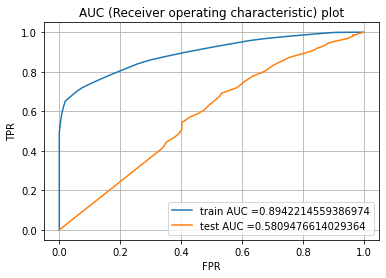

In [0]:

tree = DecisionTreeClassifier(min_samples_split=100, max_depth=50, criterion='entropy') 
tree.fit(X_tr_w2v, y_train)

#predicted_y for tuned parameter
y_train_pred = batch_predict(tree, X_tr_w2v)
y_test_pred = batch_predict(tree, X_te_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_for_tfidf_w2v = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC (Receiver operating characteristic) plot")
plt.grid()
plt.show()

In [0]:

print("="*100)
from sklearn.metrics import confusion_matrix
best_threshold = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_threshold )))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_threshold )))

Train confusion matrix
[[ 416   34]
 [ 813 2087]]
Test confusion matrix
[[113 108]
 [533 896]]


In [0]:
from prettytable import PrettyTable

t = PrettyTable(['Vectorizer', 'Model','Hyper parameter (min_samples_split)','Hyper parameter (max_depth)','AUC'])

t.add_row(['TFIDF', 'DecisionTreeClassifier', min_samples_split_tfidf ,max_depth_tfidf, round( auc_for_tfidf , 3 )])
t.add_row(['TFIDF-W2V', 'DecisionTreeClassifier', min_samples_split_w2v ,max_depth_w2v, round(auc_for_tfidf_w2v , 3 )])
print(t)

+------------+------------------------+-------------------------------------+-----------------------------+-------+
| Vectorizer |         Model          | Hyper parameter (min_samples_split) | Hyper parameter (max_depth) |  AUC  |
+------------+------------------------+-------------------------------------+-----------------------------+-------+
|   TFIDF    | DecisionTreeClassifier |                 500                 |              10             | 0.881 |
| TFIDF-W2V  | DecisionTreeClassifier |                 100                 |              50             | 0.894 |
+------------+------------------------+-------------------------------------+-----------------------------+-------+
